In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sns.set()
%matplotlib inline
csv.field_size_limit(sys.maxsize)

131072

In [2]:
depth_list = []


with open('../../results/geuvadis_results/merged.pileup.txt', 'rt') as csvfile:
    
    spamreader = csv.reader(csvfile, delimiter='\t', quotechar='|')
    
    for row in spamreader:
        
        transcript = row[0]
        pos = row[1]
        depth = row[3]
        
        
            
        depth_list.append([transcript, pos, depth])

In [3]:
df = pd.DataFrame(columns=['transcript', 'pos', 'depth'], data = depth_list)

df['depth'] = pd.to_numeric(df['depth'])

In [4]:
df.head()

,transcript,pos,depth
0,Alpha_GEX_64k_HEX,1,1
1,Alpha_GEX_64k_HEX,2,1
2,Alpha_GEX_64k_HEX,3,1
3,Alpha_GEX_64k_HEX,4,1
4,Alpha_GEX_64k_HEX,5,1


In [5]:
alpha_wt_cov = df[df['transcript'] == 'Alpha_GEX_64k_HEX']
alpha_dup_cov = df[df['transcript'] == 'Alpha_GEX_79k_dup_FAM']
beta_cov = df[df['transcript'] == 'BETA_new_GEX_FAM']

Text(0.5,1,'Coverage over Reference')

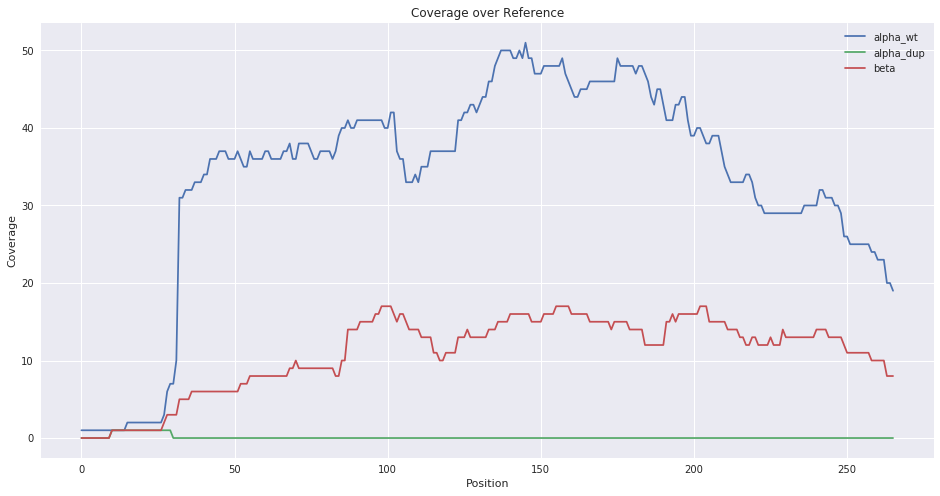

In [6]:
ax = alpha_wt_cov.plot(x='pos', y='depth', use_index=False, figsize=(16,8))
alpha_dup_cov.plot(x='pos', y='depth', ax=ax,use_index=False)
beta_cov.plot(x='pos', y='depth', ax=ax,use_index=False)

ax.legend(["alpha_wt", "alpha_dup", 'beta'])
ax.set_xlabel('Position')
ax.set_ylabel('Coverage')
ax.set_title('Coverage over Reference')